## Setup

In [2]:
from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/My\ Drive/Google\ Colab\ Projects/gender-bias/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
articles  combined_articles.csv  vectorizer.joblib  word_dictionaries.csv  word_dictionaries.json


In [10]:
import json
import os
import pandas as pd
import glob

In [11]:
# Change current working directory to Project folder in GDrive
os.chdir("/content/drive/MyDrive/Google Colab Projects/gender-bias")

In [ ]:
# List of RAW URLs
urls = [
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Arts%2C%20Culture%2C%20and%20Entertainment_negative_20240128093903.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Arts%2C%20Culture%2C%20and%20Entertainment_negative_20240204073508.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Arts%2C%20Culture%2C%20and%20Entertainment_negative_20240616070014.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Arts%2C%20Culture%2C%20and%20Entertainment_positive_20240310070009.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Crime%2C%20Law%20and%20Justice_negative_20240526070023.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Crime%2C%20Law%20and%20Justice_negative_20240714070027.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Crime%2C%20Law%20and%20Justice_positive_20240128131953.zip"
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Disaster%20and%20Accident_negative_20240128131143.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Disaster%20and%20Accident_positive_20240721070030.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Economy%2C%20Business%20and%20Finance_positive_20240128131642.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Economy%2C%20Business%20and%20Finance_positive_20240128132100.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Environment_positive_20240317070020.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Environment_positive_20240804070026.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Environment_positive_20240818070024.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Environment_positive_20241103070048.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Health_negative_20240128131616.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Health_positive_20240505070030.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Health_positive_20241208070106.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_negative_20240128124335.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20240128124133.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20240207151932.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20240331070024.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20240414070024.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20240519070030.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Human%20Interest_positive_20241020070055.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Labor_negative_20241013070038.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Labor_positive_20240128131920.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Lifestyle%20and%20Leisure_negative_20240929070058.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Lifestyle%20and%20Leisure_positive_20240205143245.zip"
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Politics_negative_20240128132206.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Politics_negative_20240707070024.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Politics_negative_20240728070020.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Politics_negative_20241124070053.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Politics_positive_20240811070033.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_negative_20240123174403.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_negative_20240128094104.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_negative_20240128131303.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_negative_20240324093311.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_negative_20240623070025.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_positive_20240128131228.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_positive_20240428070027.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Religion%20and%20Belief_positive_20240630070023.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Science%20and%20Technology_negative_20241215070200.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Science%20and%20Technology_positive_20240128132252.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Science%20and%20Technology_positive_20240205092329.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Science%20and%20Technology_positive_20240512070025.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Science%20and%20Technology_positive_20241117070043.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Social%20Issue_negative_20240225070019.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Social%20Issue_negative_20240908070032.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Social%20Issue_negative_20240915070041.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Sport_negative_20240128131809.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Sport_negative_20240825070025.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/Sport_positive_20241006070048.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_negative_20240128093740.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_negative_20240303070025.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_negative_20240922070043.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_negative_20241027070053.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_positive_20240128131846.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_positive_20240218070019.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_positive_20240407070023.zip",
    "https://github.com/Webhose/free-news-datasets/raw/master/News_Datasets/War%2C%20Conflict%20and%20Unrest_positive_20240602070024.zip",


]

# Function to download and unzip files
def download_and_unzip(url):
    # Extract filename from URL, replacing %20 with space
    filename = url.split('/')[-1].replace('%20', ' ')
    folder_name = os.path.splitext(filename)[0]

    # Download the file
    print(f"Downloading: {filename}")
    !curl -L -o "{filename}" "{url}"

    # Verify file exists
    !ls "{filename}"

    # Create folder and unzip
    print(f"Unzipping to folder: {folder_name}")
    !mkdir -p "{folder_name}"
    !unzip "{filename}" -d "{folder_name}"

    # Remove the zip file after extraction
    !rm "{filename}"

# Download and unzip each file
for url in urls:
    download_and_unzip(url)

print("All files downloaded and extracted!")

Streaming output truncated to the last 5000 lines.
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_34.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_35.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_36.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_37.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_38.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_39.json  
 extracting: War%2C Conflict and Unrest_negative_20241027070053/War, Conflict and Unrest_negative_20241027070053/article_40.json  
 extracting: War%2C Conflict and

In [ ]:
import os
import re

def clean_folder_names(directory):
    """
    Rename folders in the given directory by removing spaces and
    replacing non-alphanumeric characters with dashes.

    Args:
        directory (str): Path to the directory containing folders to rename
    """
    # Iterate through all items in the directory
    for item in os.listdir(directory):
        # Construct full path
        item_path = os.path.join(directory, item)

        # Check if it's a directory
        if os.path.isdir(item_path):
            # Clean the folder name
            # Remove leading/trailing whitespace
            # Replace multiple spaces/special characters with a single dash
            # Remove any non-alphanumeric characters except dashes
            clean_name = re.sub(r'\s+', '-', item.strip())
            clean_name = re.sub(r'[^a-zA-Z0-9-]', '', clean_name)

            # Remove consecutive dashes
            clean_name = re.sub(r'-+', '-', clean_name)

            # Create full paths for old and new names
            new_item_path = os.path.join(directory, clean_name)

            # Rename if the new name is different from the original
            if clean_name != item:
                try:
                    os.rename(item_path, new_item_path)
                    print(f"Renamed: '{item}' -> '{clean_name}'")
                except Exception as e:
                    print(f"Error renaming '{item}': {e}")


clean_folder_names('.')

Renamed: 'Arts%2C Culture%2C and Entertainment_negative_20240128093903' -> 'Arts2C-Culture2C-and-Entertainmentnegative20240128093903'
Renamed: 'Arts%2C Culture%2C and Entertainment_negative_20240204073508' -> 'Arts2C-Culture2C-and-Entertainmentnegative20240204073508'
Renamed: 'Arts%2C Culture%2C and Entertainment_negative_20240616070014' -> 'Arts2C-Culture2C-and-Entertainmentnegative20240616070014'
Renamed: 'Arts%2C Culture%2C and Entertainment_positive_20240310070009' -> 'Arts2C-Culture2C-and-Entertainmentpositive20240310070009'
Renamed: 'Crime%2C Law and Justice_negative_20240526070023' -> 'Crime2C-Law-and-Justicenegative20240526070023'
Renamed: 'Crime%2C Law and Justice_negative_20240714070027' -> 'Crime2C-Law-and-Justicenegative20240714070027'
Renamed: 'Disaster and Accident_negative_20240128131143' -> 'Disaster-and-Accidentnegative20240128131143'
Renamed: 'Disaster and Accident_positive_20240721070030' -> 'Disaster-and-Accidentpositive20240721070030'
Renamed: 'Economy%2C Business 

In [ ]:
import os
import shutil

def move_directories(exclude_dirs=['global-news-dataset', 'archive', 'articles']):
    # Get current directory
    current_dir = '.'

    # Create articles directory if it doesn't exist
    os.makedirs('articles', exist_ok=True)

    # Iterate through items in current directory
    for item in os.listdir(current_dir):
        # Full path of the item
        item_path = os.path.join(current_dir, item)

        # Check if it's a directory and not in excluded list
        if (os.path.isdir(item_path) and
            item not in exclude_dirs and
            item != '.'):

            # Destination path
            dest_path = os.path.join('articles', item)

            try:
                # Move directory
                shutil.move(item_path, dest_path)
                print(f"Moved: {item}")
            except Exception as e:
                print(f"Error moving {item}: {e}")

# Run the function
move_directories()

In [ ]:
import os
import json
import pandas as pd
import glob

def process_json_folders(base_directory, output_csv_path):
    """
    Process all JSON files in ALL nested category folders.

    Parameters:
    - base_directory: Path to the base directory containing article folders
    - output_csv_path: Path where the final combined CSV will be saved
    """
    # List to store all dataframes
    all_dataframes = []

    # Iterate through all first-level subdirectories in the base directory
    for category_parent_folder in os.listdir(base_directory):
        category_parent_path = os.path.join(base_directory, category_parent_folder)

        # Skip if not a directory
        if not os.path.isdir(category_parent_path):
            continue

        # Iterate through ALL second-level directories
        for category_folder in os.listdir(category_parent_path):
            category_full_path = os.path.join(category_parent_path, category_folder)

            # Skip if not a directory
            if not os.path.isdir(category_full_path):
                continue

            # Find all JSON files in the category folder
            json_files = glob.glob(os.path.join(category_full_path, '*.json'))

            # Process each JSON file in the folder
            for json_file in json_files:
                try:
                    # Read the JSON file
                    with open(json_file, 'r', encoding='utf-8') as f:
                        data = json.load(f)

                    # Extract only the specified keys
                    filtered_data = {
                        'category': category_parent_folder,
                        'subcategory': category_folder,
                        'source_file': os.path.basename(json_file),
                        'author': data.get('author', ''),
                        'published': data.get('published', ''),
                        'country': data.get('country', ''),
                        'title': data.get('title', ''),
                        'text': data.get('text', '')
                    }

                    # Convert to DataFrame and append
                    df = pd.DataFrame([filtered_data])
                    all_dataframes.append(df)

                except Exception as e:
                    print(f"Error processing {json_file}: {e}")

    # Combine all dataframes
    if all_dataframes:
        final_df = pd.concat(all_dataframes, ignore_index=True)

        # Save to CSV
        final_df.to_csv(output_csv_path, index=False)
        print(f"Combined CSV saved to {output_csv_path}")
        print(f"Total articles processed: {len(final_df)}")
        print(f"Categories found: {final_df['category'].unique()}")
        print(f"Subcategories found: {final_df['subcategory'].unique()}")
    else:
        print("No JSON files found in the specified directory.")

# Example usage in Google Colab
def main():
    # Mount Google Drive (if using Google Colab)
    from google.colab import drive
    drive.mount('/content/drive')

    # Set your base directory and output path
    base_directory = '/content/drive/MyDrive/gender_bias/articles'
    output_csv_path = '/content/drive/MyDrive/gender_bias/combined_articles.csv'

    # Process the JSON files
    process_json_folders(base_directory, output_csv_path)

# Uncomment and run the main function when ready
# main()

# Standalone version for local use
if __name__ == '__main__':
    # Replace with your local paths
    base_directory = 'articles/'
    output_csv_path = 'combined_articles.csv'
    process_json_folders(base_directory, output_csv_path)

Combined CSV saved to combined_articles.csv
Total articles processed: 53000
Categories found: ['Crime2C-Law-and-Justicenegative20240526070023'
 'Crime2C-Law-and-Justicenegative20240714070027'
 'Disaster-and-Accidentpositive20240721070030'
 'Economy2C-Business-and-Financepositive20240128131642'
 'Economy2C-Business-and-Financepositive20240128132100'
 'Environment_positive_20240317070020'
 'Environment_positive_20240804070026'
 'Environment_positive_20240818070024'
 'Environment_positive_20241103070048' 'Health_negative_20240128131616'
 'Health_positive_20240505070030' 'Health_positive_20241208070106'
 'Human-Interestnegative20240128124335'
 'Human-Interestpositive20240128124133'
 'Human-Interestpositive20240207151932'
 'Human-Interestpositive20240331070024'
 'Human-Interestpositive20240414070024'
 'Human-Interestpositive20240519070030'
 'Human-Interestpositive20241020070055' 'Labor_negative_20241013070038'
 'Labor_positive_20240128131920'
 'Lifestyle-and-Leisurenegative20240929070058'
 

In [12]:
import pandas as pd


def load_news_dataset(filepath='combined_articles.csv'):
    df = pd.read_csv(filepath)
    return df

In [13]:
df = load_news_dataset()
df.head()

,category,subcategory,source_file,author,published,country,title,text
0,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_1.json,I. Santos,2024-04-25T22:20:00.000+03:00,NaN,Apuñalado un menor por un «ajuste de cuentas» ...,"Secciones Servicios Destacamos León Jueves, 25..."
1,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_2.json,Yucatan Times,2024-04-25T22:00:00.000+03:00,NaN,Special operation carried out to guarantee the...,After the death of a teenager in Bojorquez par...
2,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_3.json,Jon Seidel,2024-04-25T23:56:00.000+03:00,NaN,Three years for man who helped set CTA van on ...,clock CST_ The Hardest-Working Paper in Americ...
3,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_4.json,Valeria Lipparini,2024-04-25T23:59:00.000+03:00,NaN,Tragedia a Conegliano: precipita dal quarto pi...,"Una disattenzione che si è trasformata, in un ..."
4,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_5.json,Author,2024-04-25T15:57:00.000+03:00,NaN,Re: rgfziwrqtmxasdxMahguellaeer,"My Community\nWelcome,\nGuest\n. Please\nlogin..."


## Data Pre-processing

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df.shape

(53000, 8)

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53000 entries, 0 to 52999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     53000 non-null  object 
 1   subcategory  53000 non-null  object 
 2   source_file  53000 non-null  object 
 3   author       48117 non-null  object 
 4   published    53000 non-null  object 
 5   country      0 non-null      float64
 6   title        52866 non-null  object 
 7   text         53000 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.2+ MB


In [17]:
df.isna().sum()

,0
category,0
subcategory,0
source_file,0
author,4883
published,0
country,53000
title,134
text,0


In [18]:
df = df[['category', 'subcategory', 'source_file', 'title', 'text']]
df.shape

(53000, 5)

In [19]:
df.duplicated().sum()

0

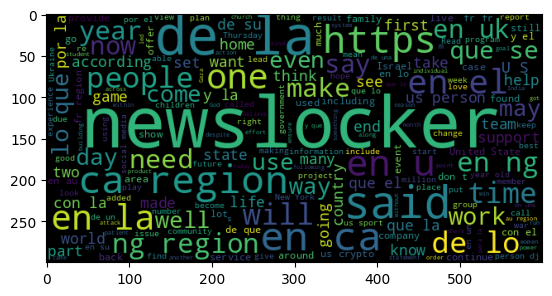

In [20]:
# title wordcloud
wc = WordCloud(width=600,height=300).generate(' '.join(df.text))
plt.imshow(wc);

In [21]:
df['text_len'] = df['text'].apply(len)

<Axes: xlabel='text_len', ylabel='Density'>

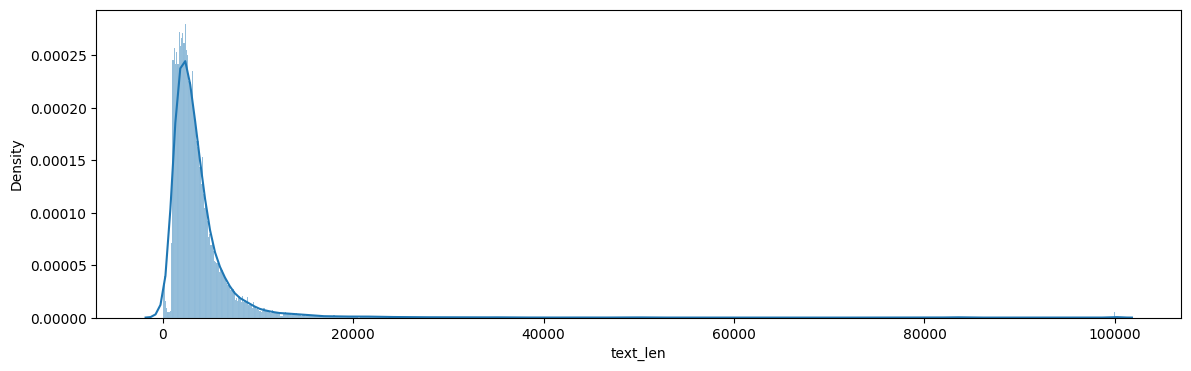

In [22]:
fig, ax = plt.subplots(figsize=(14,4))
sns.histplot(
    df["text_len"],
    ax=ax,
    kde=True,
    stat="density",
    kde_kws=dict(cut=3),
    alpha=.5,
    edgecolor=(1, 1, 1, .4)
)

In [23]:
df.describe()

,text_len
count,53000.000000
mean,3922.738321
std,5239.245080
min,4.000000
25%,1926.000000
50%,2901.000000
75%,4341.000000
max,100000.000000


## Text Pre-processing and EDA

In [24]:
# Import libraries for preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [25]:
bias_word_dictionaries = dict()

# Assumption: used os.chdir() earlier to change working directory to project GDrive folder
with open('word_dictionaries.json', 'r') as f:
  bias_word_dictionaries = json.loads(f.read())

# Load our gender-related word dictionaries
female_bias_words = set(bias_word_dictionaries["female_bias_words"])
female_words = set(bias_word_dictionaries["female_words"])
empowerment_words = set(bias_word_dictionaries["empowerement"])

In [26]:
# Text preprocessing function
def preprocess_text(text):
    """Clean and preprocess text data"""
    if isinstance(text, str):
        # Convert to lowercase
        text = text.lower()

        # Remove special characters and digits
        text = re.sub(r'[^a-zA-Z\s]', '', text)

        # Tokenize
        tokens = word_tokenize(text)

        # Remove stopwords and lemmatize
        lemmatizer = WordNetLemmatizer()
        stop_words = set(stopwords.words('english'))
        tokens = [lemmatizer.lemmatize(token) for token in tokens
                 if token not in stop_words]

        # Return space separated pre-processed text
        return ' '.join(tokens)
    # If not string, return empty string
    return ''

In [27]:
# Feature extraction functions
def extract_gender_features(text):
    """Extract gender-related features from text"""
    if not isinstance(text, str):
        return pd.Series({
            'female_bias_ratio': 0,
            'female_mention_ratio': 0,
            'empowerment_ratio': 0
        })

    words = text.lower().split()
    total_words = len(words) if words else 1

    return pd.Series({
        'female_bias_ratio': sum(1 for w in words if w in female_bias_words) / total_words,
        'female_mention_ratio': sum(1 for w in words if w in female_words) / total_words,
        'empowerment_ratio': sum(1 for w in words if w in empowerment_words) / total_words
    })

In [28]:
# Prepare the dataset
def prepare_dataset():
    global df

    # Preprocess text
    print("Preprocessing articles...")
    df['cleaned_content'] = df['text'].apply(preprocess_text)



    # NOTE: we are proceeding with bias features for only the `cleaned_description` column.
    # If time permits, it might be worthwhile to change the pipeline to use title and compare.
    # Extract features
    print("Extracting gender-related features...")
    gender_features = df['cleaned_content'].apply(extract_gender_features)
    df = pd.concat([df, gender_features], axis=1)

    # Create binary labels for high gender bias
    df['high_bias'] = (df['female_bias_ratio'] > df['female_bias_ratio'].mean()) & \
                     (df['empowerment_ratio'] < df['empowerment_ratio'].mean())

    return df

In [29]:
# Analyze gender bias
def analyze_gender_bias(df):
    """Analyze gender bias patterns in the dataset"""

    # Basic statistics
    stats = {
        'total_articles': len(df),
        'avg_female_bias': df['female_bias_ratio'].mean(),
        'avg_female_mention': df['female_mention_ratio'].mean(),
        'avg_empowerment': df['empowerment_ratio'].mean(),
        'high_bias_percentage': (df['high_bias'].sum() / len(df)) * 100
    }

    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Distribution of female bias ratio
    sns.histplot(df['female_bias_ratio'], ax=axes[0,0], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4),)
    axes[0,0].set_title('Distribution of Female Bias Ratio')

    # Distribution of empowerment ratio
    sns.histplot(df['empowerment_ratio'], ax=axes[0,1], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.5, edgecolor=(1, 1, 1, .4))
    axes[0,1].set_title('Distribution of Empowerment Ratio')

    # Female mention vs Empowerment scatter
    sns.scatterplot(data=df, x='female_mention_ratio', y='empowerment_ratio', ax=axes[1,0])
    axes[1,0].set_title('Female Mentions vs Empowerment')

    # High bias articles by source (top 10 sources)
    bias_by_source = df.groupby('category')['high_bias'].mean().sort_values(ascending=False)[:10]
    sns.barplot(x=bias_by_source.values, y=bias_by_source.index, ax=axes[1,1])
    axes[1,1].set_title('Gender Bias by News Source')

    plt.tight_layout()

    return stats, fig

In [30]:
# Long-running preprocessing
df = prepare_dataset()

Preprocessing articles...
Extracting gender-related features...


In [31]:
df.head()

,category,subcategory,source_file,title,text,text_len,cleaned_content,female_bias_ratio,female_mention_ratio,empowerment_ratio,high_bias
0,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_1.json,Apuñalado un menor por un «ajuste de cuentas» ...,"Secciones Servicios Destacamos León Jueves, 25...",1819,secciones servicios destacamos len jueves de a...,0.000000,0.0,0.003676,False
1,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_2.json,Special operation carried out to guarantee the...,After the death of a teenager in Bojorquez par...,1510,death teenager bojorquez park mrida operation ...,0.022727,0.0,0.037879,False
2,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_3.json,Three years for man who helped set CTA van on ...,clock CST_ The Hardest-Working Paper in Americ...,2869,clock cst hardestworking paper america thursda...,0.000000,0.0,0.038043,False
3,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_4.json,Tragedia a Conegliano: precipita dal quarto pi...,"Una disattenzione che si è trasformata, in un ...",3268,una disattenzione che si trasformata un attimo...,0.000000,0.0,0.000000,False
4,Crime2C-Law-and-Justicenegative20240526070023,"Crime, Law and Justice_negative_20240526070023",article_5.json,Re: rgfziwrqtmxasdxMahguellaeer,"My Community\nWelcome,\nGuest\n. Please\nlogin...",2110,community welcome guest please login register ...,0.000000,0.0,0.014085,False


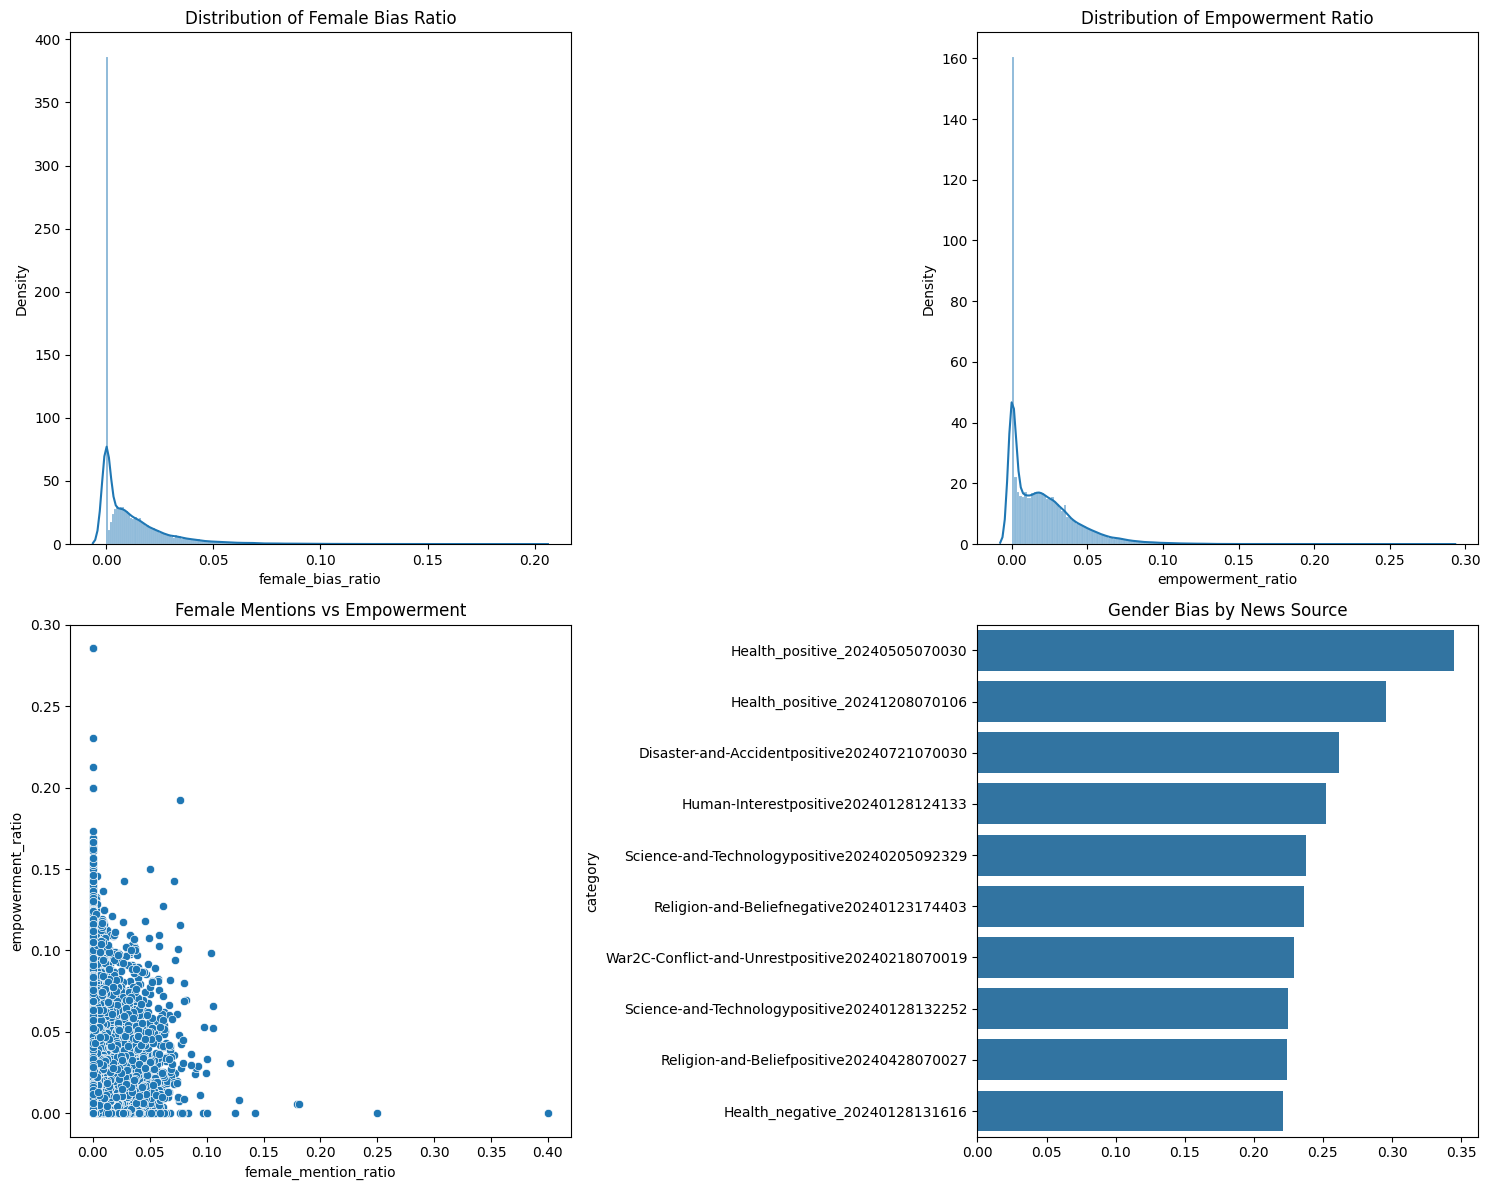

In [32]:
# Analyze bias
stats, fig = analyze_gender_bias(df)

In [33]:
print("\nDataset Statistics:")
for key, value in stats.items():
    print(f"{key}: {value:.2f}")


Dataset Statistics:
total_articles: 53000.00
avg_female_bias: 0.01
avg_female_mention: 0.00
avg_empowerment: 0.02
high_bias_percentage: 14.64


## Model Selection

In [34]:
# Import libraries for training

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib


In [35]:
vectorizer = TfidfVectorizer(max_features=1000)

# Train a simple classifier
def train_bias_classifier(df):
    """Train a classifier to predict gender bias in articles"""

    # Prepare features
    X_text = vectorizer.fit_transform(df['cleaned_content'])

    # Combine with numerical features
    X_numerical = df[['female_bias_ratio', 'female_mention_ratio', 'empowerment_ratio']]
    X = np.hstack([X_text.toarray(), X_numerical])

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, df['high_bias'], test_size=0.2, random_state=42
    )

    # Train model
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Get feature importance
    feature_names = vectorizer.get_feature_names_out().tolist() + [
        'female_bias_ratio', 'female_mention_ratio', 'empowerment_ratio'
    ]

    importance = pd.DataFrame({
        'feature': feature_names,
        'importance': abs(model.coef_[0])
    }).sort_values('importance', ascending=False)

    return model, importance.head(20)

In [36]:
# Train and evaluate model
model, top_features = train_bias_classifier(df)
print("\nTop predictive features for gender bias:")
print(top_features)


Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.98      0.95      9009
        True       0.81      0.55      0.65      1591

    accuracy                           0.91     10600
   macro avg       0.87      0.76      0.80     10600
weighted avg       0.91      0.91      0.91     10600


Top predictive features for gender bias:
                feature  importance
1002  empowerment_ratio   22.913252
1000  female_bias_ratio   13.870039
326               first    8.605243
986                work    7.824712
99             business    7.292128
687               power    6.221178
453                 job    5.736574
797               share    5.514254
835                star    5.474667
480              leader    5.470648
858             support    5.246032
526               march    4.988956
364                goal    4.909144
636              parent    4.797696
556            minister    4.767101
68                award    4.72

In [37]:
def get_recommendations(features):
    recommendations = []

    if features['female_bias_ratio'] > 0.1:
        recommendations.append("Consider reducing stereotypical gender-associated terms")
    if features['empowerment_ratio'] < 0.05:
        recommendations.append("Consider including more empowerment-related terms")

    return recommendations

In [38]:
# To analyze a new article
def analyze_new_article(article_text, model, vectorizer):
    # Preprocess
    cleaned_text = preprocess_text(article_text)

    # Extract features
    features = extract_gender_features(cleaned_text)

    # Get prediction
    text_features = vectorizer.transform([cleaned_text])
    X = np.hstack([text_features.toarray(), features.values.reshape(1, -1)])

    bias_probability = model.predict_proba(X)[0][1]

    return {
        'bias_probability': bias_probability,
        'feature_analysis': features,
        'recommendation': get_recommendations(features)
    }

In [39]:
article_text_for_testing = "Weeks after her election defeat, Vice President Kamala Harris continues to solicit donations through frequent fundraising emails. Critics claim the aggressive approach is alienating supporters while raising questions about her campaign’s financial management. Emails from Harris’ team, dubbed the \"Harris Fight Fund,\" have urged donors to contribute immediately, warning of the urgent need to counteract President-elect Donald Trump’s nominations and policies."

article_text_for_testing = 'President Trump used Wednesday night\'s rally in Michigan as a chance to take aim at his 2016 presidential rival Hillary Clinton, as well as a slew of other Democrats, as the U.S. House back in Washington voted along party lines to impeach him. Trump addressed thousands of supporters who waited out in the cold to attend his “Merry Christmas” rally in Battle Creek. About 40 minutes after the rally began, the Democrat-controlled House voted – without any Republican support – to impeach Trump for "abuse of power" and "obstruction of Congress" related to his dealings with Ukraine.'
analyze_new_article(article_text_for_testing, model, vectorizer)

{'bias_probability': 0.2193502175772307,
 'feature_analysis': female_bias_ratio       0.035714
 female_mention_ratio    0.000000
 empowerment_ratio       0.035714
 dtype: float64,
 'recommendation': ['Consider including more empowerment-related terms']}

In [ ]:
drive.flush_and_unmount()